# SPEECH EMOTION RECOGNITION

In [1]:
%pip install numpy==1.24

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

## Collecting the data

In [3]:
data = pd.read_csv('features.csv')

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-637.701233,104.299019,4.894947,20.494011,12.552954,2.851410,-6.633390,-4.091278,-10.423918,-6.406950,...,0.172893,-1.170210,-5.292450,-0.573319,1.019471,-3.492607,-3.468123,-1.214944,1.971239,male_calm
1,-596.908460,86.871936,9.470162,17.109819,11.198966,1.541056,-6.677264,-5.755428,-9.684472,-6.891256,...,0.033803,-1.986515,-5.103855,-1.253110,0.514896,-3.268317,-4.502895,0.167153,0.256732,male_calm
2,-698.086548,99.795929,1.892679,19.915264,7.532868,1.265761,-9.188656,-5.798194,-12.299710,-4.976400,...,-1.639542,-2.603761,-4.890347,-0.879222,-1.250208,-3.449960,-4.708529,-0.086224,-3.034044,male_calm
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male_angry
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male_angry


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,4320.0,-487.003996,136.291809,-839.943481,-584.871048,-493.733840,-392.564923,-81.179808
sd,4320.0,52.347325,23.301751,-15.569962,32.756441,52.938862,69.891104,117.403458
median,4320.0,-6.899311,16.316507,-79.263588,-16.253773,-4.516660,4.681348,30.102003
Q25,4320.0,7.564491,9.501292,-36.626686,1.014772,6.905284,13.967491,38.804756
Q75,4320.0,-2.946746,9.863238,-42.949089,-8.933470,-2.113036,3.681489,25.467150
IQR,4320.0,-7.424758,8.204065,-41.675949,-12.121491,-6.581761,-2.204921,19.140991
skew,4320.0,-9.849076,7.280637,-34.720089,-14.668655,-9.012351,-4.521343,11.820717
kurt,4320.0,-11.586352,6.673772,-36.939785,-16.202100,-10.471962,-6.650337,8.074190
spent,4320.0,-10.100073,5.833754,-38.967739,-13.316231,-9.068425,-6.205477,9.730897
sfm,4320.0,-3.638752,4.520046,-26.159826,-6.156888,-3.794484,-1.066079,37.959518


## Selecting only female voices

In [6]:
lst = ['angry', 'fear', 'calm', 'happy', 'sad']
df = pd.DataFrame()
for i in lst:
    data2 = data[data['labels'] == 'female_'+i]
    df = pd.concat([df, data2], ignore_index = True)

In [7]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-450.549652,61.809902,-26.145689,10.767628,-13.064669,-6.765702,-8.887250,-15.082304,-4.744698,-0.943475,...,-2.663873,-6.789433,0.172617,-8.002610,-4.910583,-4.545643,-1.577067,-2.927566,4.435866,female_angry
1,-310.778487,18.284627,-5.212723,1.574379,-5.469805,-5.958433,-4.336190,-6.964692,-6.183722,-2.011976,...,-3.307439,-2.205908,-1.528581,-5.254907,-4.415926,-2.067638,-1.294969,-0.443241,2.464193,female_angry
2,-515.303528,59.625275,-28.678961,11.009341,-17.128212,-5.280230,-13.428881,-14.762235,-3.267685,-0.203355,...,-2.010382,-6.684038,-1.110060,-11.550034,-3.654559,-4.730125,-0.374136,-2.112749,7.279234,female_angry
3,-356.070343,46.858479,-38.072037,4.688856,-24.178297,-12.409111,-5.074822,-21.457508,-4.531121,-6.804982,...,-4.470675,-11.419093,-0.547117,-6.825386,-0.601908,0.360667,4.812973,1.895805,6.195353,female_angry
4,-179.329554,13.082402,-9.581805,-1.763870,-7.838848,-6.392852,-2.329187,-6.976578,-4.377413,-1.626493,...,-2.563863,-3.592128,-1.833758,-2.349397,-1.184402,0.914805,1.833074,3.247238,4.384018,female_angry


In [8]:
label = np.array(df['labels'])
for i in range(len(label)):
    label[i] = label[i].split('_')[1]
label

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype=object)

In [9]:
df['labels'] = label

In [10]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-450.549652,61.809902,-26.145689,10.767628,-13.064669,-6.765702,-8.887250,-15.082304,-4.744698,-0.943475,...,-2.663873,-6.789433,0.172617,-8.002610,-4.910583,-4.545643,-1.577067,-2.927566,4.435866,angry
1,-310.778487,18.284627,-5.212723,1.574379,-5.469805,-5.958433,-4.336190,-6.964692,-6.183722,-2.011976,...,-3.307439,-2.205908,-1.528581,-5.254907,-4.415926,-2.067638,-1.294969,-0.443241,2.464193,angry
2,-515.303528,59.625275,-28.678961,11.009341,-17.128212,-5.280230,-13.428881,-14.762235,-3.267685,-0.203355,...,-2.010382,-6.684038,-1.110060,-11.550034,-3.654559,-4.730125,-0.374136,-2.112749,7.279234,angry
3,-356.070343,46.858479,-38.072037,4.688856,-24.178297,-12.409111,-5.074822,-21.457508,-4.531121,-6.804982,...,-4.470675,-11.419093,-0.547117,-6.825386,-0.601908,0.360667,4.812973,1.895805,6.195353,angry
4,-179.329554,13.082402,-9.581805,-1.763870,-7.838848,-6.392852,-2.329187,-6.976578,-4.377413,-1.626493,...,-2.563863,-3.592128,-1.833758,-2.349397,-1.184402,0.914805,1.833074,3.247238,4.384018,angry


## Pre-processing of Dataset

In [11]:
is_duplicate = df.duplicated(keep=False)

In [12]:
is_duplicate.value_counts()

False    1440
dtype: int64

In [13]:
df.shape

(1440, 21)

In [14]:
df['labels'] = df['labels'].replace({'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'calm': 4})

In [15]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,labels
0,-450.549652,61.809902,-26.145689,10.767628,-13.064669,-6.765702,-8.887250,-15.082304,-4.744698,-0.943475,...,-2.663873,-6.789433,0.172617,-8.002610,-4.910583,-4.545643,-1.577067,-2.927566,4.435866,0
1,-310.778487,18.284627,-5.212723,1.574379,-5.469805,-5.958433,-4.336190,-6.964692,-6.183722,-2.011976,...,-3.307439,-2.205908,-1.528581,-5.254907,-4.415926,-2.067638,-1.294969,-0.443241,2.464193,0
2,-515.303528,59.625275,-28.678961,11.009341,-17.128212,-5.280230,-13.428881,-14.762235,-3.267685,-0.203355,...,-2.010382,-6.684038,-1.110060,-11.550034,-3.654559,-4.730125,-0.374136,-2.112749,7.279234,0
3,-356.070343,46.858479,-38.072037,4.688856,-24.178297,-12.409111,-5.074822,-21.457508,-4.531121,-6.804982,...,-4.470675,-11.419093,-0.547117,-6.825386,-0.601908,0.360667,4.812973,1.895805,6.195353,0
4,-179.329554,13.082402,-9.581805,-1.763870,-7.838848,-6.392852,-2.329187,-6.976578,-4.377413,-1.626493,...,-2.563863,-3.592128,-1.833758,-2.349397,-1.184402,0.914805,1.833074,3.247238,4.384018,0


In [16]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1:]

In [17]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-450.549652,61.809902,-26.145689,10.767628,-13.064669,-6.765702,-8.887250,-15.082304,-4.744698,-0.943475,-3.903497,-2.663873,-6.789433,0.172617,-8.002610,-4.910583,-4.545643,-1.577067,-2.927566,4.435866
1,-310.778487,18.284627,-5.212723,1.574379,-5.469805,-5.958433,-4.336190,-6.964692,-6.183722,-2.011976,-1.402956,-3.307439,-2.205908,-1.528581,-5.254907,-4.415926,-2.067638,-1.294969,-0.443241,2.464193
2,-515.303528,59.625275,-28.678961,11.009341,-17.128212,-5.280230,-13.428881,-14.762235,-3.267685,-0.203355,-4.448493,-2.010382,-6.684038,-1.110060,-11.550034,-3.654559,-4.730125,-0.374136,-2.112749,7.279234
3,-356.070343,46.858479,-38.072037,4.688856,-24.178297,-12.409111,-5.074822,-21.457508,-4.531121,-6.804982,-6.521662,-4.470675,-11.419093,-0.547117,-6.825386,-0.601908,0.360667,4.812973,1.895805,6.195353
4,-179.329554,13.082402,-9.581805,-1.763870,-7.838848,-6.392852,-2.329187,-6.976578,-4.377413,-1.626493,-1.299276,-2.563863,-3.592128,-1.833758,-2.349397,-1.184402,0.914805,1.833074,3.247238,4.384018


In [18]:
y_data.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [19]:
y_data.value_counts()

labels
0         288
1         288
2         288
3         288
4         288
dtype: int64

## Normalizing data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scalar = MinMaxScaler()

In [22]:
x_data_minmax = scalar.fit_transform(x_data)

In [23]:
x_data_minmax

array([[0.52974588, 0.70804484, 0.54786744, ..., 0.2596011 , 0.33989795,
        0.41969814],
       [0.72123961, 0.27990836, 0.76377377, ..., 0.26609178, 0.39149064,
        0.37807139],
       [0.44102972, 0.68655574, 0.52173882, ..., 0.28727887, 0.35681949,
        0.47972845],
       ...,
       [0.32265872, 0.57657362, 0.79376199, ..., 0.30829267, 0.28503251,
        0.33214121],
       [0.55801013, 0.23922135, 0.88480072, ..., 0.27531432, 0.35063582,
        0.2976386 ],
       [0.24794265, 0.55396093, 0.76053818, ..., 0.26490797, 0.31990391,
        0.35171472]])

In [24]:
x_data = pd.DataFrame(x_data_minmax, columns=x_data.columns)

In [25]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.529746,0.708045,0.547867,0.765436,0.558213,0.728731,0.587658,0.533577,0.733492,0.262637,0.519807,0.307369,0.302169,0.346882,0.318540,0.351696,0.304144,0.259601,0.339898,0.419698
1,0.721240,0.279908,0.763774,0.616961,0.700078,0.745582,0.691187,0.731741,0.701147,0.242385,0.574459,0.296116,0.403008,0.309923,0.380180,0.364635,0.369967,0.266092,0.391491,0.378071
2,0.441030,0.686556,0.521739,0.769339,0.482310,0.759739,0.484342,0.541390,0.766690,0.276665,0.507896,0.318796,0.304488,0.319016,0.238959,0.384550,0.299243,0.287279,0.356819,0.479728
3,0.659187,0.560975,0.424857,0.667261,0.350621,0.610928,0.674385,0.377948,0.738292,0.151539,0.462585,0.275776,0.200316,0.331246,0.344949,0.464398,0.434471,0.406627,0.440066,0.456845
4,0.901331,0.228737,0.718710,0.563047,0.655826,0.736514,0.736844,0.731451,0.741747,0.249691,0.576725,0.309118,0.372511,0.303293,0.445361,0.449162,0.449190,0.338064,0.468132,0.418603


In [26]:
x_data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,1440.0,0.500890,0.192588,0.0,0.356706,0.495994,0.639921,1.0
sd,1440.0,0.519757,0.199463,0.0,0.347627,0.523925,0.687641,1.0
median,1440.0,0.662312,0.188719,0.0,0.542692,0.697225,0.808360,1.0
Q25,1440.0,0.634480,0.133668,0.0,0.556766,0.637788,0.719876,1.0
Q75,1440.0,0.638143,0.159117,0.0,0.541074,0.668952,0.758847,1.0
IQR,1440.0,0.624921,0.162360,0.0,0.532775,0.655785,0.743421,1.0
skew,1440.0,0.523219,0.156571,0.0,0.416921,0.529522,0.637063,1.0
kurt,1440.0,0.520503,0.155220,0.0,0.402295,0.524126,0.647460,1.0
spent,1440.0,0.605865,0.122210,0.0,0.540658,0.633732,0.691159,1.0
sfm,1440.0,0.217607,0.087302,0.0,0.171496,0.209409,0.253978,1.0


In [27]:
np.min(x_data.meanfreq)

0.0

In [28]:
x_data.shape

(1440, 20)

In [29]:
y_data.shape

(1440, 1)

### The values assigned for each emotion after Pre-processing are
0 - angry ;
1 - fear ;
2 - happy ;
3 - sad ;
4 - calm

## Feature Selection

In [30]:
#Principle Component Analysis
from sklearn.decomposition import PCA

In [31]:
pca = PCA()

In [32]:
pca.fit(x_data)

PCA()

In [33]:
pca.feature_names_in_

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'spent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'], dtype=object)

In [34]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.32394174, 0.1989021 , 0.09477179, 0.07307739, 0.05409793,
       0.04116499, 0.03854873, 0.03178516, 0.02549526, 0.02270528,
       0.01967623, 0.01516488, 0.01412749, 0.01044157, 0.00987181,
       0.00818977, 0.00562728, 0.00509602, 0.00402511, 0.00328948])

In [35]:
csum = np.cumsum(exp_variance)

In [36]:
csum

array([0.32394174, 0.52284384, 0.61761563, 0.69069302, 0.74479095,
       0.78595594, 0.82450467, 0.85628983, 0.88178509, 0.90449037,
       0.9241666 , 0.93933147, 0.95345897, 0.96390054, 0.97377235,
       0.98196211, 0.9875894 , 0.99268541, 0.99671052, 1.        ])

In [37]:
d = np.argmax(csum >= 0.95) + 1
d

13

In [38]:
x_data = x_data.iloc[:,:d]

In [39]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,spent,sfm,mode,centroid,meanfun
0,0.529746,0.708045,0.547867,0.765436,0.558213,0.728731,0.587658,0.533577,0.733492,0.262637,0.519807,0.307369,0.302169
1,0.721240,0.279908,0.763774,0.616961,0.700078,0.745582,0.691187,0.731741,0.701147,0.242385,0.574459,0.296116,0.403008
2,0.441030,0.686556,0.521739,0.769339,0.482310,0.759739,0.484342,0.541390,0.766690,0.276665,0.507896,0.318796,0.304488
3,0.659187,0.560975,0.424857,0.667261,0.350621,0.610928,0.674385,0.377948,0.738292,0.151539,0.462585,0.275776,0.200316
4,0.901331,0.228737,0.718710,0.563047,0.655826,0.736514,0.736844,0.731451,0.741747,0.249691,0.576725,0.309118,0.372511


## Train-Test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 123)

## Model Building

In [42]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression(penalty='elasticnet', l1_ratio=0.5 ,multi_class='multinomial', class_weight='balanced', solver='saga')

In [45]:
lr.fit(x_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

In [46]:
y_lr_pred = lr.predict(x_test)

In [47]:
print("Accuracy score :", accuracy_score(y_test, y_lr_pred))

Accuracy score : 0.6574074074074074


### Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(kernel='rbf', C=10, class_weight='balanced',decision_function_shape='ovo', shrinking=False, gamma = 5, break_ties=False, random_state=42)

In [50]:
svm.fit(x_train, y_train.values.ravel())

SVC(C=10, class_weight='balanced', decision_function_shape='ovo', gamma=5,
    random_state=42, shrinking=False)

In [51]:
y_svm_pred = svm.predict(x_test)

In [52]:
print("Accuracy score :", accuracy_score(y_test, y_svm_pred))

Accuracy score : 0.8402777777777778


### K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'n_neighbors':[3,5,7,9,11,13,15], 'weights':['distance','uniform'], 'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[1,2,3,4]}

In [57]:
grid_search = GridSearchCV(knn, param_grid)

In [58]:
grid_search.fit(x_train, y_train.values.ravel())

d:\downloads\Python 3.10.0\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\downloads\Python 3.10.0\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\downloads\Python 3.10.0\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "d:\downloads\Python 3.10.0\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "d:\downloads\Python 3.10.0\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  File "d:\downloads\Python 3.10.0\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['distance', 'uniform']})

In [59]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(n_jobs=1, n_neighbors=3, weights='distance')

In [60]:
y_knn_pred = best_knn.predict(x_test)

In [61]:
print("Accuracy score :", accuracy_score(y_test, y_knn_pred))

Accuracy score : 0.7893518518518519


### Naive Bayes Classifier

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
nb = MultinomialNB()

In [64]:
Y_train = np.array(y_train)

In [65]:
nb.fit(x_train, y_train)

d:\downloads\Python 3.10.0\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [66]:
y_nb_pred = nb.predict(x_test)

In [67]:
print("Accuracy score :", accuracy_score(y_test, y_nb_pred))

Accuracy score : 0.4236111111111111


### Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=123, max_depth=None, max_features=None, min_impurity_decrease= 0.0,
                            class_weight="balanced")

In [70]:
dt.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=123)

In [71]:
y_dt_pred = dt.predict(x_test)

In [72]:
print("Accuracy score : ", accuracy_score(y_test, y_dt_pred))

Accuracy score :  0.5532407407407407


### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(n_estimators=600, criterion='entropy', random_state=123, max_depth=None, bootstrap=True, oob_score=True,
                             max_features=None, min_impurity_decrease= 0.0, class_weight="balanced_subsample")

In [75]:
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=None, n_estimators=600, oob_score=True,
                       random_state=123)

In [76]:
y_rfc_pred = rfc.predict(x_test)

In [77]:
print("Accuracy score :",(accuracy_score(y_test, y_rfc_pred)))

Accuracy score : 0.7754629629629629


# The best accuracy is obtained by *Support Vector Machine* algorithm

### Evaluation Metrics

In [78]:
print("Accuracy score :",(accuracy_score(y_test, y_svm_pred)))

Accuracy score : 0.8402777777777778


In [79]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [80]:
precision = precision_score(y_test, y_svm_pred, average='weighted')
print("Precision :", precision)

Precision : 0.8393976435610467


In [81]:
recall = recall_score(y_test, y_svm_pred, average='weighted')
print("Recall :", recall)

Recall : 0.8402777777777778


In [82]:
f1 = f1_score(y_test, y_svm_pred, average="weighted")
print("F1 score :",f1)

F1 score : 0.8386501628350742


In [83]:
svm.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [84]:
svm.n_features_in_

13

In [85]:
svm.feature_names_in_

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'spent', 'sfm', 'mode', 'centroid', 'meanfun'], dtype=object)

In [86]:
F1 = 2 * (precision * recall) / (precision + recall)

In [87]:
F1

0.8398374800783619

In [96]:
from sklearn.metrics import classification_report

In [97]:
report = classification_report(y_test, y_svm_pred)

In [99]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.81      0.77      0.79        71
           2       0.86      0.82      0.84        80
           3       0.81      0.73      0.77        88
           4       0.82      0.91      0.87        92

    accuracy                           0.84       432
   macro avg       0.84      0.83      0.83       432
weighted avg       0.84      0.84      0.84       432



## Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
con_matrix = confusion_matrix(y_test,y_svm_pred)

In [90]:
import seaborn as sns

In [91]:
import matplotlib.pyplot as plt

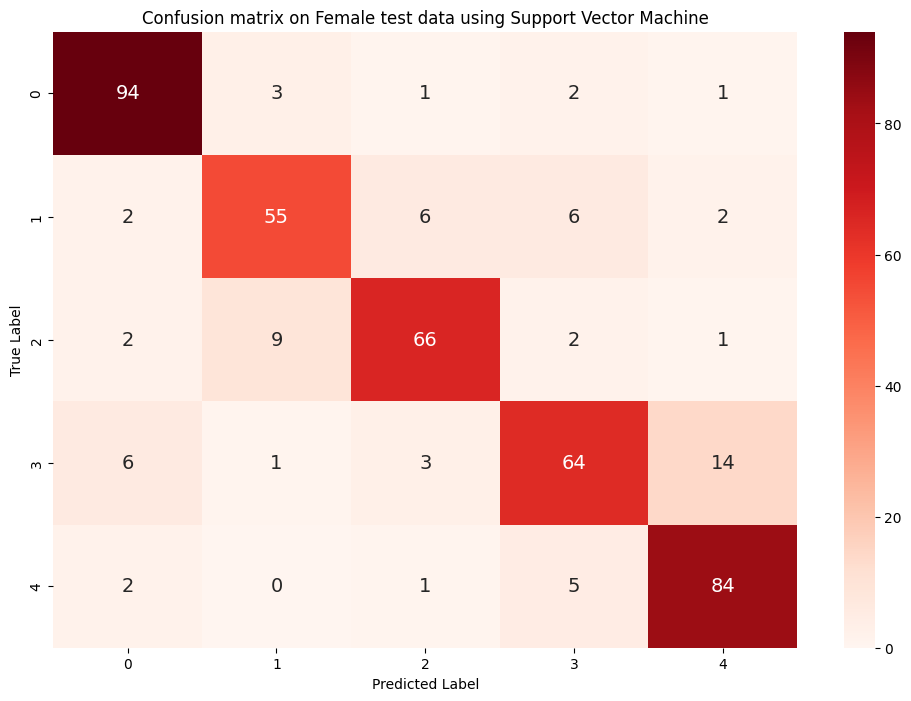

In [92]:
plt.figure(figsize = (12,8))
plt.title("Confusion matrix on Female test data using Support Vector Machine")
sns.heatmap(con_matrix, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=True, annot_kws={'size':14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Saving the ML Model Using joblib

In [93]:
import joblib

In [94]:
# with open('svm_female_joblib.joblib', 'wb') as file:
#     joblib.dump(svm, file)

In [95]:
with open('svm_female_joblib.joblib', 'rb') as file:
    loaded_model = joblib.load(file)